In [53]:
# Import the libraries we'll need
import pandas as pd
import numpy as np

In [72]:
data = pd.read_csv("els_extracted_data_v4.csv")
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,F3ATTAINMENT,BYTXCSTD,BYSES1,F3JUNEDSTAT,F3REGION,F3B35
0,101101,1011,4000,-7,0,0,1,2,5,1,3,56.21,-0.25,3,1,-7
1,101102,1011,3000,20,0,0,5,2,2,0,10,57.66,0.58,3,1,-3
2,101104,1011,37000,50,0,0,2,2,7,0,6,66.50,-0.85,3,1,0
3,101105,1011,1500,25,0,0,2,2,3,-4,4,46.46,-0.80,2,1,1
4,101106,1011,48000,28,0,0,1,2,4,0,4,36.17,-1.41,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,461230,4612,-4,-4,0,0,2,2,4,-4,-4,38.04,-0.34,-4,-4,-4
16193,461231,4612,7000,30,0,1,2,2,4,0,1,33.81,-1.08,4,3,1
16194,461232,4612,-4,-4,0,1,1,2,5,1,-4,37.94,-1.54,-4,-4,-4
16195,461233,4612,20000,40,0,0,1,2,4,0,4,45.93,-1.41,1,3,0


In [73]:
# Filter data
data = data[data.F3ERN2011 > 0]
data = data[data.F3ERN2011 < 200000]
data = data[data.F3C02 >= 0]
data = data[data.F3JUNEDSTAT >= 3]
data = data[data.BYS14 >= 0]
data = data[data.BYRACE >= 0]
data = data[data.BYTXCSTD >= 0]
data = data[data.F3REGION >= 0]
data = data[data.BYP61 >= -0.25]
data = data[data.BYMOTHED >= 0]
data = data[data.BYTXCSTD >= 0]
data = data[data.F3B35 >= 0]

<AxesSubplot:>

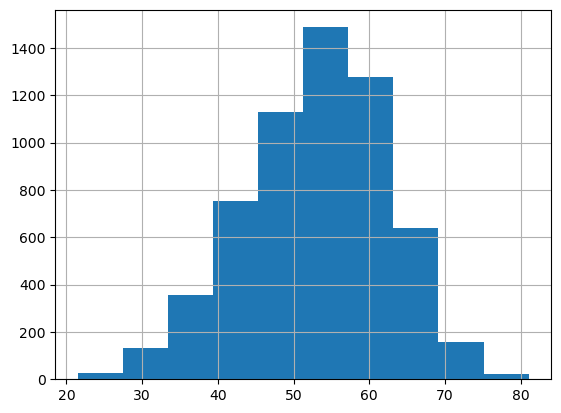

In [74]:
# Explore soe of data here if you need to
data.BYTXCSTD.hist()

In [75]:
# look at modified data
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,F3ATTAINMENT,BYTXCSTD,BYSES1,F3JUNEDSTAT,F3REGION,F3B35
2,101104,1011,37000,50,0,0,2,2,7,0,6,66.50,-0.85,3,1,0
5,101107,1011,35000,40,0,0,2,1,4,0,3,30.72,-1.07,3,1,1
7,101109,1011,68000,40,0,0,2,1,7,0,6,68.39,-0.16,3,1,1
10,101112,1011,18000,1,0,0,6,1,3,0,3,58.06,-0.18,3,1,0
18,101120,1011,1000,40,1,1,2,1,7,0,2,43.80,-0.57,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,1,42.40,-1.53,4,3,0
16181,461205,4612,100,6,0,1,2,2,5,1,1,34.70,0.56,4,3,0
16182,461207,4612,29000,40,0,0,3,2,5,1,5,39.53,-0.21,3,3,1
16185,461214,4612,15000,44,0,1,2,1,5,0,2,38.00,-0.60,4,3,0


In [76]:
# Create dummies for BYSEX
data["female"] = (data["BYS14"] == 2).astype(int)

# Check that this method is working by crosstabing the results
pd.crosstab(index=data['BYS14'], columns=data['female'])

female,0,1
BYS14,,
1,2933,0
2,0,3043


In [77]:
# Now that we have verified the code above works for greating dichotomus dummy variables, 
# we can use this same method to safely create the remaining variables.

# For variables which have more than 2 categories, we can use pd.get_dummies()

# Create dummies for BYP61
data["no_parent"] = (data["BYP61"] == 1).astype(int)

# Create dummies for BYMOTHED
moth_dummies = pd.get_dummies(data["BYMOTHED"], prefix="moth_ed")
data = pd.concat([data, moth_dummies], axis=1)

# Create dummies for F3REGION
region_dummies = pd.get_dummies(data["F3REGION"], prefix="region")
data = pd.concat([data, region_dummies], axis=1)

# Create dummies for high_school_grad
data["high_school_grad"] = (data["F3EVERDO"] == 0).astype(int)

# Create dummies for F3EVRGED
data["ged"] = (data["F3EVRGED"] == 1).astype(int)

In [78]:
# Create dummies for BYRACE2, which uses the same coding scheme used for race/ethnicity in the paper
data["BYRACE2"] = np.where(data["BYRACE"].isin([4, 5]), 4,  
                    np.where(data["BYRACE"].isin([1,6]), 1, data["BYRACE"]))

# Check your work!
pd.crosstab(index=data['BYRACE'], columns=data['BYRACE2'])

BYRACE2,1,2,3,4,7
BYRACE,,,,,
1,50,0,0,0,0
2,0,426,0,0,0
3,0,0,539,0,0
4,0,0,0,342,0
5,0,0,0,384,0
6,246,0,0,0,0
7,0,0,0,0,3989


In [79]:
# Once you've check your work, now make dummies
race_dummies = pd.get_dummies(data["BYRACE2"])
race_dummies # we need to use better column names so it's not confusing

,1,2,3,4,7
2,0,0,0,0,1
5,0,0,0,1,0
7,0,0,0,0,1
10,0,0,1,0,0
18,0,0,0,0,1
...,...,...,...,...,...
16179,0,0,0,1,0
16181,0,0,0,1,0
16182,0,0,0,1,0
16185,0,0,0,1,0


In [80]:
race_dummies.rename(columns={1:'Other', 
                             2:'Asian',
                             3:'Black',
                             4:'Hispanic',
                             7:'White'}, inplace=True) 
race_dummies

,Other,Asian,Black,Hispanic,White
2,0,0,0,0,1
5,0,0,0,1,0
7,0,0,0,0,1
10,0,0,1,0,0
18,0,0,0,0,1
...,...,...,...,...,...
16179,0,0,0,1,0
16181,0,0,0,1,0
16182,0,0,0,1,0
16185,0,0,0,1,0


In [81]:
print(pd.crosstab(index=race_dummies["Other"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Asian"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Black"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Hispanic"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["White"], columns=data['BYRACE']))

BYRACE   1    2    3    4    5    6     7
Other                                    
0        0  426  539  342  384    0  3989
1       50    0    0    0    0  246     0


BYRACE   1    2    3    4    5    6     7
Asian                                    
0       50    0  539  342  384  246  3989
1        0  426    0    0    0    0     0


BYRACE   1    2    3    4    5    6     7
Black                                    
0       50  426    0  342  384  246  3989
1        0    0  539    0    0    0     0


BYRACE     1    2    3    4    5    6     7
Hispanic                                   
0         50  426  539    0    0  246  3989
1          0    0    0  342  384    0     0


BYRACE   1    2    3    4    5    6     7
White                                    
0       50  426  539  342  384  246     0
1        0    0    0    0    0    0  3989


In [82]:
# note that this produces prettier print! But it does take up more space
pd.crosstab(index=race_dummies["Asian"], columns=data['BYRACE'])

BYRACE,1,2,3,4,5,6,7
Asian,,,,,,,
0,50,0,539,342,384,246,3989
1,0,426,0,0,0,0,0


In [83]:
# Since the dummies are good, we need to add them to our dataset
data = pd.concat([data, race_dummies], axis=1)
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,...,region_3,region_4,high_school_grad,ged,BYRACE2,Other,Asian,Black,Hispanic,White
2,101104,1011,37000,50,0,0,2,2,7,0,...,0,0,1,0,7,0,0,0,0,1
5,101107,1011,35000,40,0,0,2,1,4,0,...,0,0,1,0,4,0,0,0,1,0
7,101109,1011,68000,40,0,0,2,1,7,0,...,0,0,1,0,7,0,0,0,0,1
10,101112,1011,18000,1,0,0,6,1,3,0,...,0,0,1,0,3,0,0,1,0,0
18,101120,1011,1000,40,1,1,2,1,7,0,...,0,0,0,1,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,...,1,0,0,0,4,0,0,0,1,0
16181,461205,4612,100,6,0,1,2,2,5,1,...,1,0,0,0,4,0,0,0,1,0
16182,461207,4612,29000,40,0,0,3,2,5,1,...,1,0,1,0,4,0,0,0,1,0
16185,461214,4612,15000,44,0,1,2,1,5,0,...,1,0,0,0,4,0,0,0,1,0


In [84]:
# Recode highest education into years of education 
def post_sec_edu(value):
    if value == 4:
        return 1
    elif value == 5:
        return 2
    elif value == 6:
        return 4
    elif value == 7:
        return 5
    elif value == 8:
        return 6
    elif value == 10:
        return 8
    else:
        return 0
data['post_sec_edu'] = data['F3ATTAINMENT'].apply(post_sec_edu)
pd.crosstab(index=data["post_sec_edu"], columns=data['F3ATTAINMENT'])

F3ATTAINMENT,1,2,3,4,5,6,7,8,10
post_sec_edu,,,,,,,,,
0,117,646,1357,0,0,0,0,0,0
1,0,0,0,513,0,0,0,0,0
2,0,0,0,0,426,0,0,0,0
4,0,0,0,0,0,2260,0,0,0
5,0,0,0,0,0,0,50,0,0
6,0,0,0,0,0,0,0,479,0
8,0,0,0,0,0,0,0,0,128


In [85]:
# See final dataset
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,...,region_4,high_school_grad,ged,BYRACE2,Other,Asian,Black,Hispanic,White,post_sec_edu
2,101104,1011,37000,50,0,0,2,2,7,0,...,0,1,0,7,0,0,0,0,1,4
5,101107,1011,35000,40,0,0,2,1,4,0,...,0,1,0,4,0,0,0,1,0,0
7,101109,1011,68000,40,0,0,2,1,7,0,...,0,1,0,7,0,0,0,0,1,4
10,101112,1011,18000,1,0,0,6,1,3,0,...,0,1,0,3,0,0,1,0,0,0
18,101120,1011,1000,40,1,1,2,1,7,0,...,0,0,1,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,...,0,0,0,4,0,0,0,1,0,0
16181,461205,4612,100,6,0,1,2,2,5,1,...,0,0,0,4,0,0,0,1,0,0
16182,461207,4612,29000,40,0,0,3,2,5,1,...,0,1,0,4,0,0,0,1,0,2
16185,461214,4612,15000,44,0,1,2,1,5,0,...,0,0,0,4,0,0,0,1,0,0


In [88]:
# Model 1
import statsmodels.api as sm  # library for estimating regression models

# Define the formula for the model1
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.8143           
Min. group size:  1       Log-Likelihood:     -7936.9398       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             9.196    0.092 99.917 0.000  9.016  9.377
ged                  -0.116    0.079 -1.460 0.144 -0.271  0.040
high_school_grad      0.245    0.058  4.207 0.000  0.131  0.358
female               -0.232    0.024 -9.763 0.000 -0.278 -0.185
Black                -0.187    0.044 -4.224 0.000 -0.273 -0.100
Hispanic             -0.063    0.040 -1.582 0.114 -0.

In [89]:
# model 2
# Define the formula for the model 2
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD  + F3B35 + post_sec_edu'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.7930           
Min. group size:  1       Log-Likelihood:     -7853.0030       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            9.264    0.092 100.273 0.000  9.083  9.445
ged                 -0.110    0.078  -1.409 0.159 -0.263  0.043
high_school_grad     0.174    0.058   3.026 0.002  0.061  0.287
female              -0.265    0.024 -11.216 0.000 -0.312 -0.219
Black               -0.212    0.043  -4.884 0.000 -0.297 -0.127
Hispanic            -0.069    0.039  -1.789 0.074 -0.

In [90]:
# Create dummies for F3EVRGED
data["GEDT"] = (data["F3EVRGED"]*data["BYTXCSTD"]).astype(int)

In [91]:
# model 3
# Define the formula for the model 3
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD  + GEDT'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.8144           
Min. group size:  1       Log-Likelihood:     -7940.3257       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             9.186    0.093 99.210 0.000  9.005  9.368
ged                   0.260    0.372  0.699 0.485 -0.469  0.989
high_school_grad      0.242    0.058  4.162 0.000  0.128  0.356
female               -0.232    0.024 -9.764 0.000 -0.278 -0.185
Black                -0.187    0.044 -4.232 0.000 -0.274 -0.100
Hispanic             -0.063    0.040 -1.604 0.109 -0.